In [1]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
import ann
%matplotlib inline

In [2]:
# Load the training set
X, labels = mnist.load_mnist(dataset='training', path='data/MNIST_data')
copy0 = np.copy(X[0])
X.shape = (X.shape[0], 28*28)

# Load the test set
X_test, labels_test = mnist.load_mnist(dataset='testing', path='data/MNIST_data')
X_test.shape = (X_test.shape[0], 28*28)

# Convert to one-hot vectors
def to_one_hot(labels):
    y = np.zeros((len(labels), 10))
    for i, label in enumerate(labels):
        y[i][label] = 1
    return y
        
y = to_one_hot(labels)
y_test = to_one_hot(labels_test)
print("All good!")

All good!


In [3]:
import time

class Ticker(object):
    def __init__(self):
        self._start_time = None
    
    def tick(self, *args):
        if self._start_time is None:
            self._start_time = time.time()
            return
        print("%s seconds elapsed: %s" % (time.time() - self._start_time, args))

In [4]:
def get_error_ratio(nn):
    hit = 0
    for i, x in enumerate(X_test):
        y_ = nn.compute(x)
        l_ = np.argmax(y_)
        if l_ == labels_test[i]:
            hit += 1

    return 1-(hit/len(labels_test))

In [5]:
import time

archs = {}
def test_arch(*args):
    np.random.seed(10)
    nn = ann.NewNeuralNet(*args)
    start_time = time.time()
    ann.StochasticGradientDescent(nn, X, y, learning_rate=0.2, iterations=10000)
    training_time = time.time() - start_time
    final_cost = nn.compute_cost(X_test, y_test)
    error_ratio = 100*get_error_ratio(nn)
    print("arch: %s, training_time (sec): %s, final_cost: %s, error_ratio: %s" % (args, training_time, final_cost, error_ratio))
    archs[args] = nn

In [6]:
test_arch(28*28, 10)
test_arch(28*28, 300, 10)
test_arch(28*28, 800, 10)

arch: (784, 10), training_time (sec): 2.189617872238159, final_cost: 0.804691605819, error_ratio: 10.819999999999997
arch: (784, 300, 10), training_time (sec): 32.70547699928284, final_cost: 0.612526264324, error_ratio: 9.519999999999996
arch: (784, 800, 10), training_time (sec): 133.7222011089325, final_cost: 0.674897398506, error_ratio: 10.360000000000003


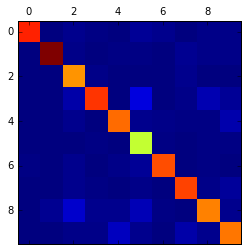

In [7]:
def conf_matrix(nn):
    matrix = np.zeros((10, 10))
    for i, x in enumerate(X_test):
        y_ = nn.compute(x)
        l_ = np.argmax(y_)
        actual = labels_test[i]
        matrix[l_][actual] += 1
    return matrix

plt.matshow(conf_matrix(archs[(784, 10)]))